In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from library.sb_utils import save_file

In [2]:
# load data from csv
df = pd.read_csv('data/BankChurners_cleaned.csv')
df.head()

,Customer_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10120 entries, 0 to 10119
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10120 non-null  int64  
 1   Attrition_Flag            10120 non-null  object 
 2   Customer_Age              10120 non-null  int64  
 3   Gender                    10120 non-null  object 
 4   Dependent_count           10120 non-null  int64  
 5   Education_Level           10120 non-null  object 
 6   Marital_Status            10120 non-null  object 
 7   Income_Category           10120 non-null  object 
 8   Card_Category             10120 non-null  object 
 9   Months_on_book            10120 non-null  int64  
 10  Total_Relationship_Count  10120 non-null  int64  
 11  Months_Inactive_12_mon    10120 non-null  int64  
 12  Contacts_Count_12_mon     10120 non-null  int64  
 13  Credit_Limit              10120 non-null  float64
 14  Total_

In [4]:
df.head()

,Customer_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
# exploring each numerical variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,10120.0,7.391854e+08,3.691060e+07,708082083.0,7.130371e+08,7.179273e+08,7.731598e+08,8.283431e+08
Customer_Age,10120.0,4.632846e+01,8.013578e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10120.0,2.346245e+00,1.298465e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10120.0,3.592964e+01,7.986857e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10120.0,3.812055e+00,1.554508e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10120.0,2.341206e+00,1.010705e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10120.0,2.455435e+00,1.106535e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10120.0,8.632213e+03,9.090971e+03,1438.3,2.555000e+03,4.549000e+03,1.106325e+04,3.451600e+04
Total_Revolving_Bal,10120.0,1.162682e+03,8.148813e+02,0.0,3.600000e+02,1.276000e+03,1.783250e+03,2.517000e+03
Avg_Open_To_Buy,10120.0,7.469531e+03,9.092731e+03,3.0,1.323500e+03,3.473000e+03,9.855500e+03,3.451600e+04


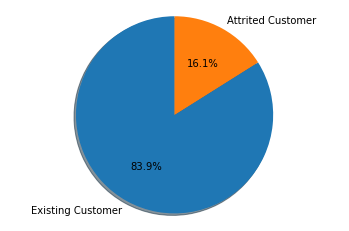

In [6]:
labels = df['Attrition_Flag'].unique()
sizes = df['Attrition_Flag'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

We can see a class imbalance here with only 16.1% of attrited customers out of a total of 10120.

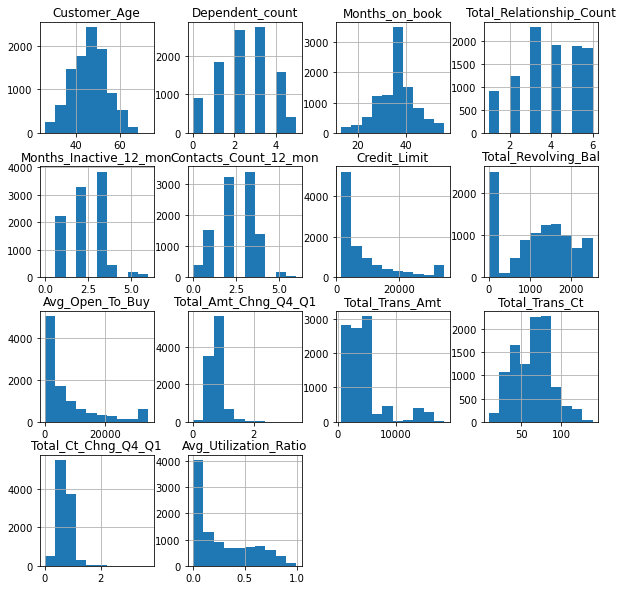

In [7]:
#histograms for each variable in df
hist = df.drop(columns=['Customer_ID']).hist(bins=10,figsize =(10,10))

In [8]:
#select categorical variables only
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


Graduate         3128
High School      2013
Unknown          1512
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


<AxesSubplot:xlabel='Education_Level', ylabel='count'>

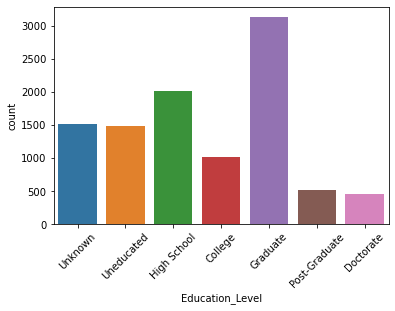

In [9]:
#get counts of each variable value
print(df_cat.Education_Level.value_counts())
#count plot for one variable
plt.xticks(rotation=45)
sns.countplot(data = df_cat, x = 'Education_Level', order=['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 
                                                          'Post-Graduate', 'Doctorate'])

Married     4687
Single      3943
Divorced     748
Unknown      742
Name: Marital_Status, dtype: int64


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

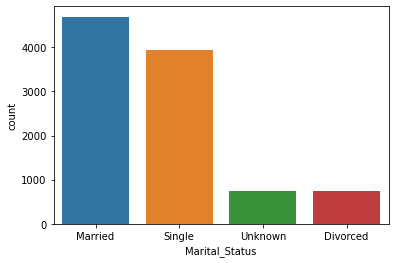

In [10]:
#get counts of each variable value
print(df_cat.Marital_Status.value_counts())
#count plot for one variable
sns.countplot(data = df_cat, x = 'Marital_Status')

Blue        9429
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


<AxesSubplot:xlabel='Card_Category', ylabel='count'>

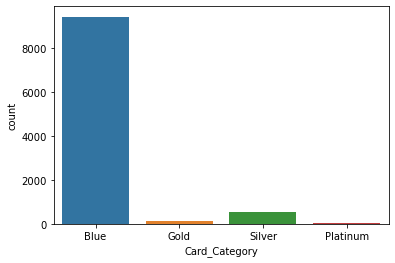

In [11]:
#get counts of each variable value
print(df_cat.Card_Category.value_counts())
#count plot for one variable
sns.countplot(data = df_cat, x = 'Card_Category')

### Create dataframe of existing customers and attrited customers

In [33]:
# Get all attrited customers
df_a = df[df['Attrition_Flag'] == 'Attrited Customer']
# Get all existing customers
df_e = df[df['Attrition_Flag'] == 'Existing Customer']

### Distribution of data

The dataset only has about 16% of customers that have churned on credit cards. Therefore, in order to scale the data for comparisons of each numerical variable, we will get the percentage of each value when compared to the total number of existing/attrited customers, then plot them on a histogram.

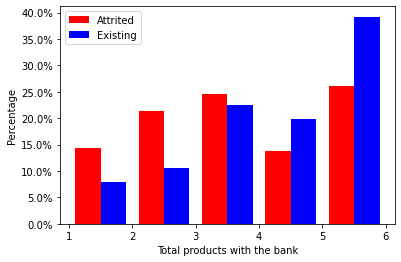

In [34]:
# Creates a histogram of Total_Relationship_Count
# import PercentFormatter to display percentage instead of real counts of each
from matplotlib.ticker import PercentFormatter

attrited = df_a['Total_Relationship_Count']
existing = df_e['Total_Relationship_Count']
legend = ['Attrited', 'Existing']
plt.hist([attrited, existing], color=['red', 'blue'], bins=5, weights=[np.ones(len(attrited)) / len(attrited), np.ones(len(existing)) / len(existing)])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Percentage')
plt.xlabel('Total products with the bank')
plt.legend(legend)
plt.show()

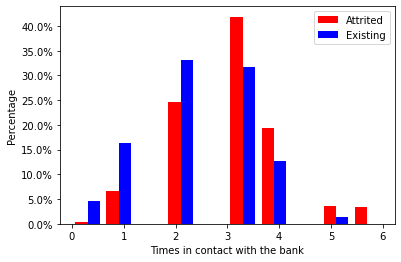

In [35]:
# Contacts count in 12 months
attrited = df_a['Contacts_Count_12_mon']
existing = df_e['Contacts_Count_12_mon']
legend = ['Attrited', 'Existing']
plt.hist([attrited, existing], color=['red', 'blue'], bins=10, weights=[np.ones(len(attrited)) / len(attrited), np.ones(len(existing)) / len(existing)])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Percentage')
plt.xlabel('Times in contact with the bank')
plt.legend(legend)
plt.show()

We can see that customers that have contacted the bank 3 or more times will be more likely to churn on their cards. This suggests that the reasons for contacting the bank might be of something they are not happy about regarding the products offered by the bank.

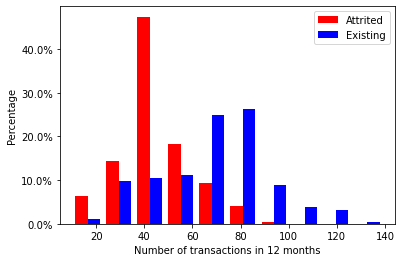

In [36]:
# Total transaction count in 12 months
attrited = df_a['Total_Trans_Ct']
existing = df_e['Total_Trans_Ct']
legend = ['Attrited', 'Existing']
plt.hist([attrited, existing], color=['red', 'blue'], bins=10, weights=[np.ones(len(attrited)) / len(attrited), np.ones(len(existing)) / len(existing)])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Percentage')
plt.xlabel('Number of transactions in 12 months')
plt.legend(legend)
plt.show()

We can clearly see that attrited customers are more likely to be the one who use their cards less often (60 times or fewer in 12 months).

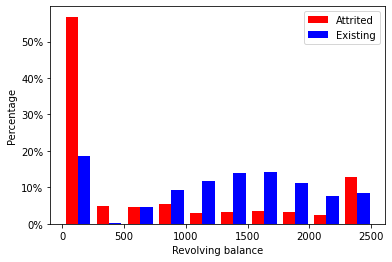

In [37]:
# Total revolving balance
attrited = df_a['Total_Revolving_Bal']
existing = df_e['Total_Revolving_Bal']
legend = ['Attrited', 'Existing']
plt.hist([attrited, existing], color=['red', 'blue'], bins=10, weights=[np.ones(len(attrited)) / len(attrited), np.ones(len(existing)) / len(existing)])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Percentage')
plt.xlabel('Revolving balance')
plt.legend(legend)
plt.show()

More than 50% of attrited customers had revolving balances of $500 or less. This also reinforces the hypothesis that less frequent card users are more likely to churn.

However, around 12% of attrited customers had revolving balances of $2,000-2,500.

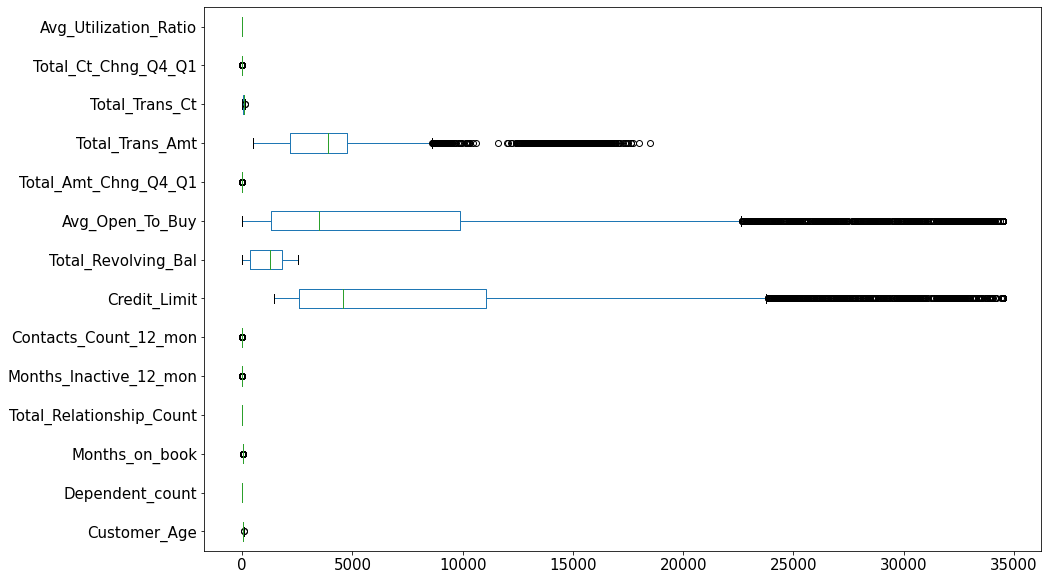

In [38]:
#create a boxplot for every numerical column in df
boxplot = df.drop(columns=['Customer_ID']).boxplot(grid=False, vert=False,fontsize=15, figsize=(15,10))

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122801,0.789121,-0.010712,0.054782,-0.018332,0.002783,0.015126,0.001427,-0.062456,-0.046319,-0.066894,-0.012586,0.006968
Dependent_count,-0.122801,1.000000,-0.103711,-0.039336,-0.010436,-0.040501,0.068087,-0.003173,0.068359,-0.034851,0.025090,0.050255,0.011950,-0.037689
Months_on_book,0.789121,-0.103711,1.000000,-0.009375,0.074481,-0.010620,0.007665,0.008563,0.006896,-0.049001,-0.038575,-0.049655,-0.014109,-0.007819
Total_Relationship_Count,-0.010712,-0.039336,-0.009375,1.000000,-0.003461,0.055340,-0.071484,0.013795,-0.072707,0.050072,-0.347784,-0.242091,0.040588,0.067821
Months_Inactive_12_mon,0.054782,-0.010436,0.074481,-0.003461,1.000000,0.029371,-0.020418,-0.042497,-0.016605,-0.032284,-0.036696,-0.042863,-0.038947,-0.007471
Contacts_Count_12_mon,-0.018332,-0.040501,-0.010620,0.055340,0.029371,1.000000,0.020730,-0.053932,0.025560,-0.024429,-0.112785,-0.152317,-0.094979,-0.055417
Credit_Limit,0.002783,0.068087,0.007665,-0.071484,-0.020418,0.020730,1.000000,0.042658,0.995983,0.012896,0.171523,0.075734,-0.001967,-0.482974
Total_Revolving_Bal,0.015126,-0.003173,0.008563,0.013795,-0.042497,-0.053932,0.042658,1.000000,-0.046969,0.058824,0.065032,0.056506,0.090928,0.623893
Avg_Open_To_Buy,0.001427,0.068359,0.006896,-0.072707,-0.016605,0.025560,0.995983,-0.046969,1.000000,0.007621,0.165662,0.070655,-0.010116,-0.538793
Total_Amt_Chng_Q4_Q1,-0.062456,-0.034851,-0.049001,0.050072,-0.032284,-0.024429,0.012896,0.058824,0.007621,1.000000,0.039652,0.005272,0.383568,0.035719


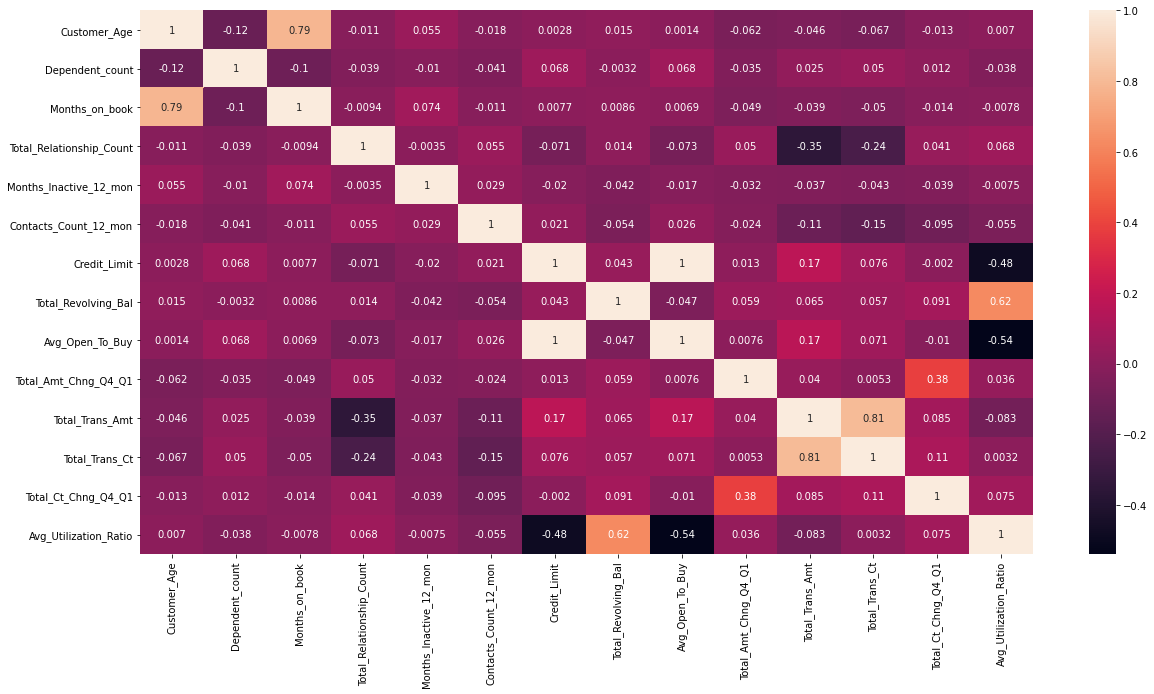

In [39]:
plt.figure(figsize=(20,10))
c= df.drop(columns=['Customer_ID']).corr()
sns.heatmap(c, annot=True)
c

We can see fairly strong correlations between a customer age and their time being a customer of the bank (0.79), total transfer amount and total transaction count (0.81), and a moderately strong correlation between total revolving balance and average utilization ratio (0.62). To avoid collinearity affecting the accuracy of our churn prediction models, we will remove one column from each highly correlated pair. The columns being removed are Customer_Age, Total_Trans_Amt and Avg_Utilization_Ratio.

On the other hand, there are moderately strong negative correlations between credit limit and average utilization ratio (-0.48), and average open to buy credit line (-0.54).

In [40]:
# drop highly correlated columns
df.drop(columns=['Customer_Age', 'Total_Trans_Amt', 'Avg_Utilization_Ratio'], inplace=True)

In [41]:
# save dataframe after EDA
datapath = 'data'
save_file(df, 'BankChurners_EDA.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "data\BankChurners_EDA.csv"
